In [16]:
import pandas as pd
import glob
import re
import matplotlib.pyplot as plt
%matplotlib widget

pd.options.mode.chained_assignment = None

date_rng = pd.date_range(start='1/1/1968', end='29/05/2024', freq='D')
daily_prices = pd.DataFrame(date_rng, columns = ['Date'])

for file in glob.glob('../data/portfolio/*.csv'):
    filename_match = re.search('[\w-]+?(?=\.)', file)
    
    df = pd.read_csv(file, parse_dates=['Date'], infer_datetime_format=True, usecols = ['Date','Close'])
    df = df.rename(columns = {'Close':filename_match.group()})
    
    daily_prices = pd.merge_asof(daily_prices, df, on='Date', tolerance=pd.Timedelta('1d'))

daily_prices.set_index(daily_prices['Date'], inplace=True)
del daily_prices['Date']

daily_prices

/workspaces/portfolio-management/.venv/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3398: UserWarning: Parsing '29/05/2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0P00000EO1,0P0001824G,ArtemisGlobalIncome,BGAmerican,BGGlobalAlpha,BGPositiveChange,BHMG,CTY,DGI9,EWI,...,JGGI,KPC,LFLindsellTrainUKEquity,MNKS,MYI,RICA,SAIN,SMT,TMFulcrumDiversifiedCore,VTArgonautAbsoluteReturn
Date,,,,,,,,,,,,,,,,,,,,,
1968-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.44,NaN,NaN,...,NaN,8.126,NaN,NaN,26.959999,NaN,13.65,NaN,NaN,NaN
1968-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.44,NaN,NaN,...,NaN,8.126,NaN,NaN,26.959999,NaN,13.65,NaN,NaN,NaN
1968-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.44,NaN,NaN,...,NaN,8.126,NaN,NaN,26.959999,NaN,13.65,NaN,NaN,NaN
1968-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.44,NaN,NaN,...,NaN,8.126,NaN,NaN,26.959999,NaN,13.65,NaN,NaN,NaN
1968-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.44,NaN,NaN,...,NaN,8.126,NaN,NaN,26.959999,NaN,13.65,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-25,341.399994,4263.180176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
def get_period(prices_df, start, end):
    df = prices_df.loc[start:end]

    for fund in df.columns:
        if fund == 'Date': continue
        initial_value = df[fund].iloc[0]
        if pd.isna(initial_value) == False:
            df[fund] = df[fund] / initial_value
            df[fund] = df[fund] - 1
            df[fund] = df[fund] * 100
            df[fund] = df[fund].interpolate(method='polynomial', order=2)
        else:
            del df[fund]
    
    return df

In [11]:
def plot_period(df, title, funds_to_plot):
    funds_can_plot = []
    for fund in funds_to_plot:
        if fund in df.columns:
            funds_can_plot.append(fund)
    
    plt.figure(figsize=(9,7))

    for fund in funds_can_plot:
        plt.plot(df.index, df[fund])

    plt.title(title)
    plt.ylabel('%')
    plt.xticks(rotation=45)

    plt.legend(funds_can_plot)
    plt.show()

In [12]:
def add_portfolio_with_2(df, name, values):
    if values[0] not in df or values[2] not in df: return
    df[name] = values[1] * df[values[0]] + values[3] * df[values[2]]

In [13]:
def add_portfolio_with_3(df, name, values):
    if values[0] not in df or values[2] not in df or values[4] not in df: return
    df[name] = values[1] * df[values[0]] + values[3] * df[values[2]] + values[5] * df[values[4]]

In [14]:
def add_portfolio_with_4(df, name, values):
    if values[0] not in df or values[2] not in df or values[4] not in df or values[6] not in df: return
    df[name] = values[1] * df[values[0]] + values[3] * df[values[2]] + values[5] * df[values[4]] + values[7] * df[values[6]]

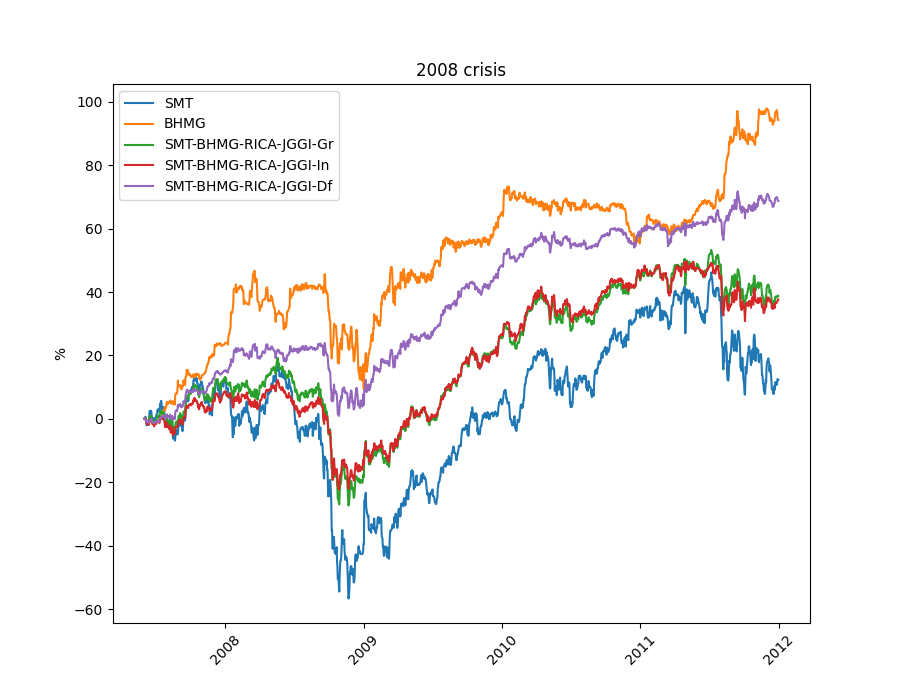

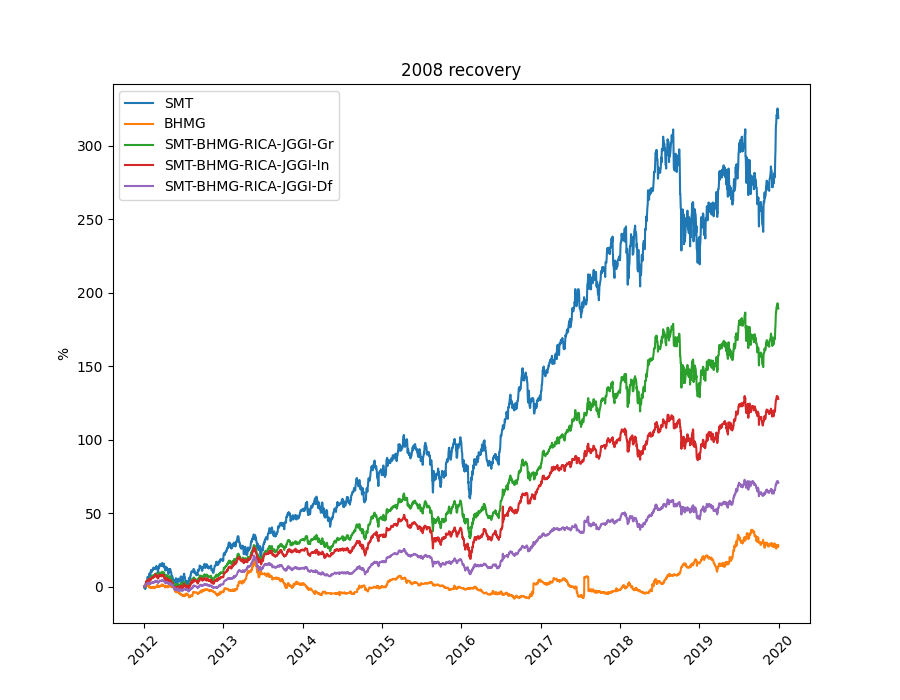

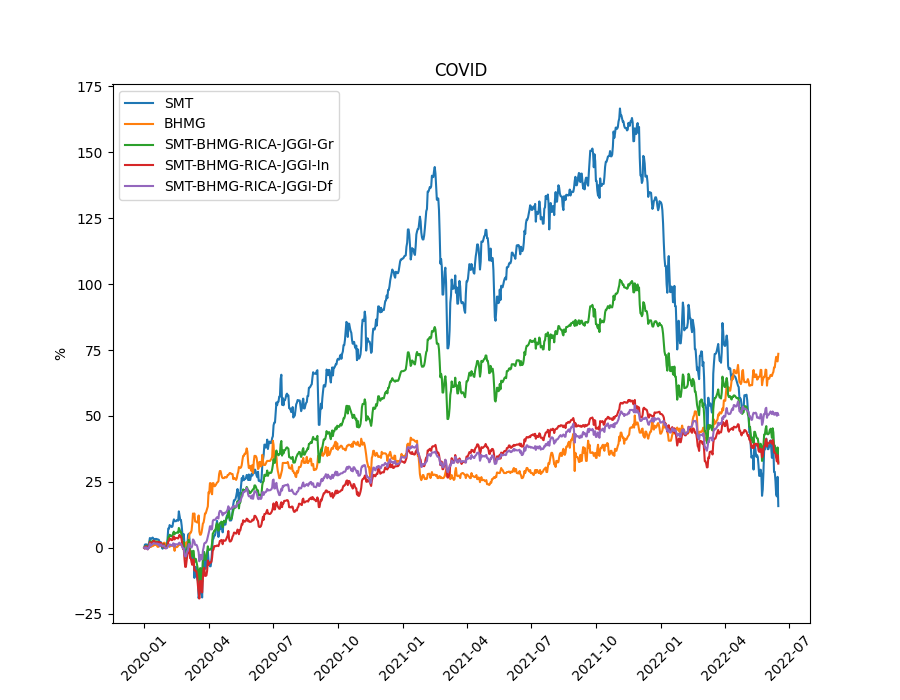

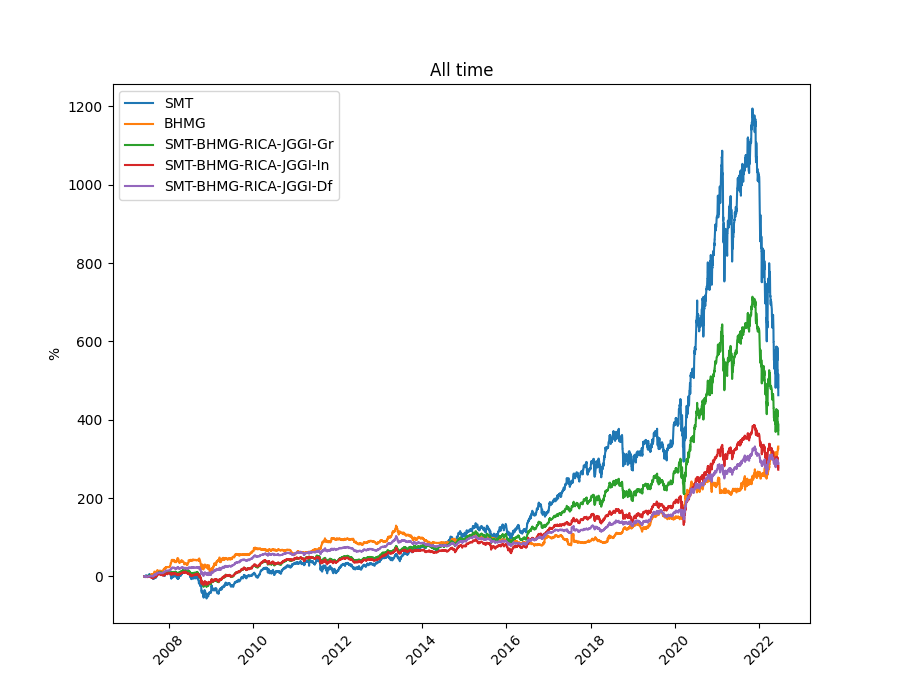

In [15]:
#periods = {2008: ('2008-01-02', '2008-12-31'), 2009: ('2009-01-02', '2009-12-31'), 2010: ('2010-01-01', '2010-12-31'), 2011: ('2011-01-01', '2011-12-31'), 2012: ('2012-01-03', '2012-12-31'), 2013: ('2013-01-02', '2013-12-31'), 2014: ('2014-01-02', '2014-12-31'), 2015: ('2015-01-02', '2015-12-31'), 2016: ('2016-01-01', '2016-12-31'), 2017: ('2017-01-03', '2017-12-31'), 2018: ('2018-01-02', '2018-12-31'), 2019: ('2019-01-02', '2019-12-31'), 2020: ('2020-01-02', '2020-12-31'), 2021: ('2021-01-01', '2021-12-31'), 2022: ('2022-01-01', '2022-06-16'), '2008 crisis': ('2007-06-01', '2011-12-31'), '2008 recovery': ('2012-01-03', '2019-12-31'), 'COVID': ('2020-01-01', '2022-06-16'), 'All time': ('2007-06-01', '2022-06-16')}
periods = {'2008 crisis': ('2007-06-01', '2011-12-31'), '2008 recovery': ('2012-01-03', '2019-12-31'), 'COVID': ('2020-01-01', '2022-06-16'), 'All time': ('2007-06-01', '2022-06-16')}
portfolios_2 = {}#{'SMT-RICA': ('SMT', .75, 'RICA', .25), 'RICA-SMT': ('SMT', .25, 'RICA', .75), 'JGGI-BHMG': ('JGGI', .75, 'BHMG', .25), 'BHMG-JGGI': ('JGGI', .25, 'BHMG', .75)}
portfolios_3 = {}#{'SMT-BHMG-RICA': ('SMT', .33, 'BHMG', .33, 'RICA', 0.34), 'BGPOS-BHMG-RICA': ('BGPositiveChange', .33, 'BHMG', .33, 'RICA', 0.34)}
portfolios_4 = {'SMT-BHMG-RICA-JGGI-Gr': ('SMT', .5, 'BHMG', .25, 'RICA', .1, 'JGGI', .15), 'SMT-BHMG-RICA-JGGI-In': ('SMT', .15, 'BHMG', .25, 'RICA', .1, 'JGGI', .5), 'SMT-BHMG-RICA-JGGI-Df': ('SMT', .1, 'BHMG', .5, 'RICA', .25, 'JGGI', .15)}
#funds_to_plot = ['SMT', 'BHMG', 'RICA', 'MYI', 'JGGI', 'SAIN', 'EWI', 'KPC']
funds_to_plot = ['SMT', 'BHMG']
funds_to_plot.extend(portfolios_2.keys())
funds_to_plot.extend(portfolios_3.keys())
funds_to_plot.extend(portfolios_4.keys())

for key in periods:
    df = get_period(daily_prices, periods[key][0], periods[key][1])
    
    for name in portfolios_2:
        add_portfolio_with_2(df, name, portfolios_2[name])
    for name in portfolios_3:
        add_portfolio_with_3(df, name, portfolios_3[name])
    for name in portfolios_4:
        add_portfolio_with_4(df, name, portfolios_4[name])
    
    plot_period(df, key, funds_to_plot)
